## 1. Reading and Understanding the Data

In [1465]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [1467]:
bikesharing = pd.read_csv("day.csv")

In [1469]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1471]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1473]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.1 Data cleanup and dummy population 

In [1476]:
bikesharing['season'] = bikesharing['season'].map({ 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [1478]:
bikesharing['weathersit'] = bikesharing['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light snow', 4: 'heavy rain'})

In [1480]:
season_dummmies = pd.get_dummies(bikesharing['season'], dtype=int)
weathersit_dummmies = pd.get_dummies(bikesharing['weathersit'], dtype=int)
bikesharing = pd.concat([bikesharing, season_dummmies, weathersit_dummmies], axis=1)
bikesharing = bikesharing.drop(['season','weathersit', 'instant', 'dteday'], axis=1)
bikesharing.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,spring,summer,winter,clear,light snow,mist
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,1,0,0,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,1,0,0,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,1,0,0,1,0,0


### 1.2 Splitting the data set

In [1483]:
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, random_state = 100)

### 1.3 Scaling the numerical columns & Finding correlation

<Axes: >

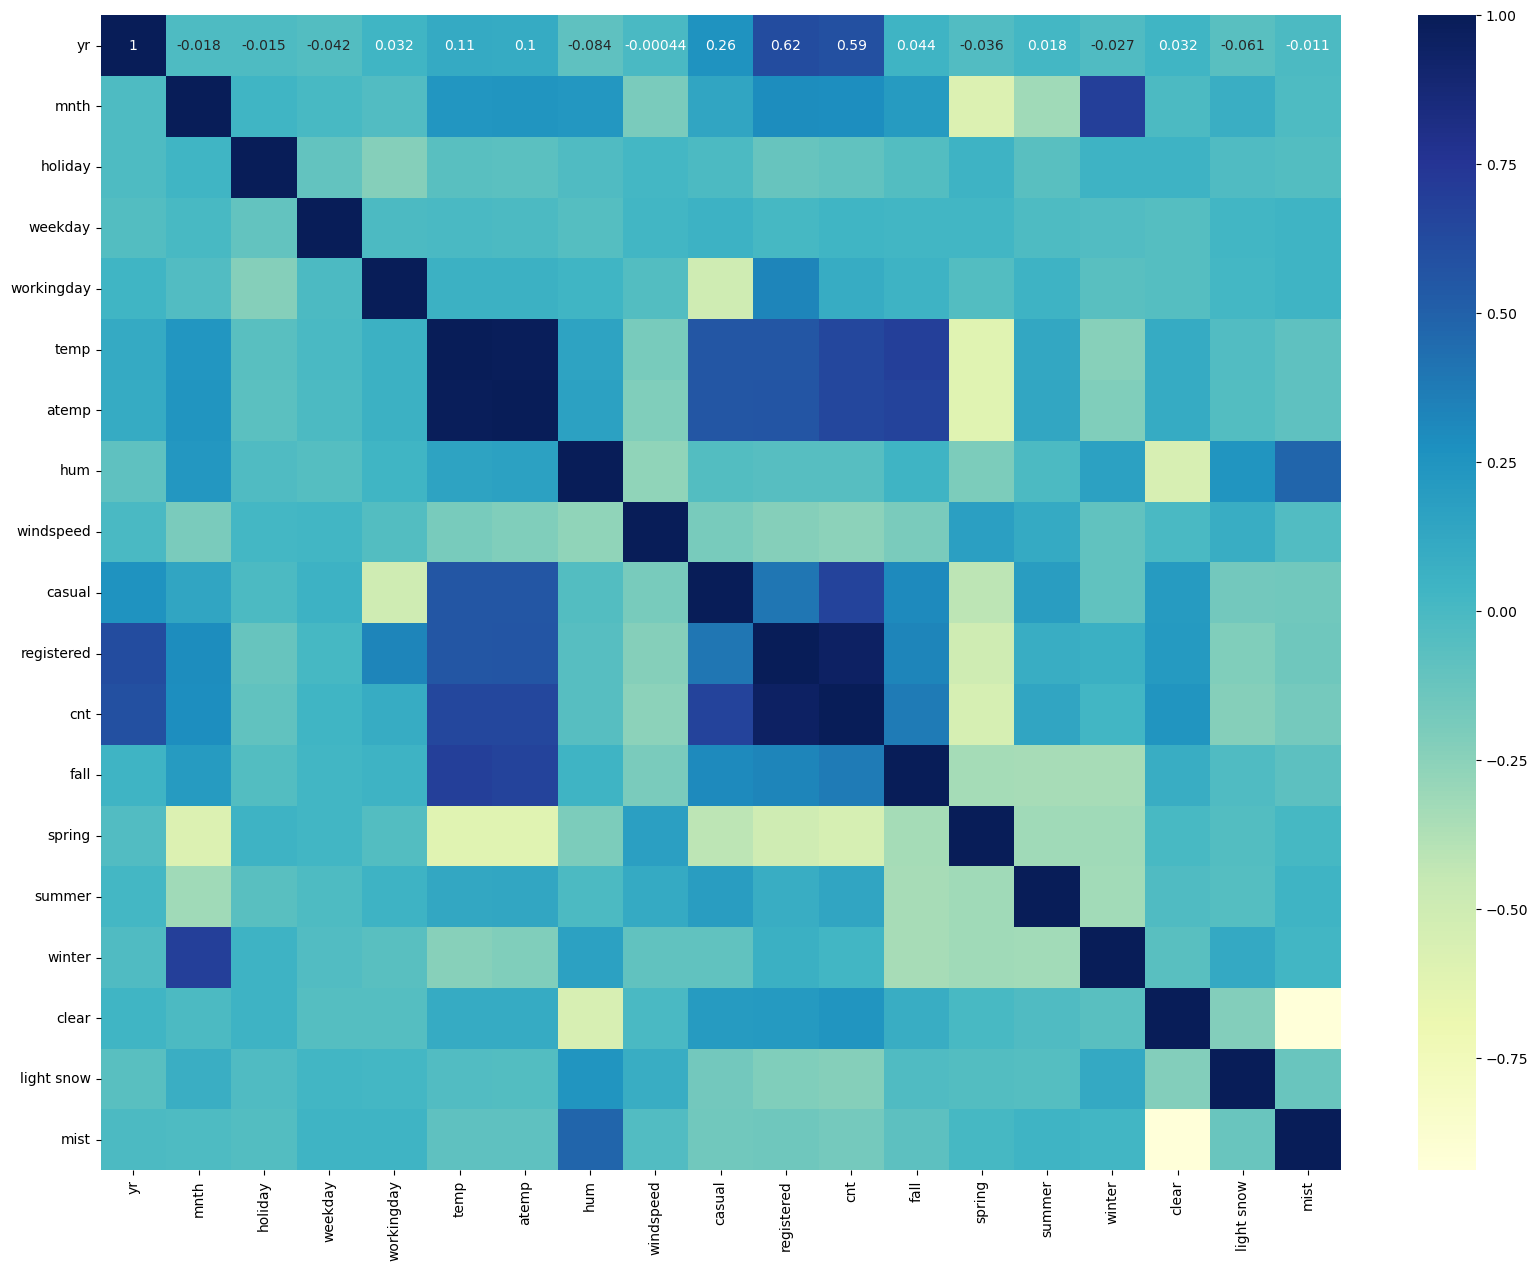

In [1486]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'casual','registered', 'cnt', 'windspeed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

plt.subplots(figsize=(20,15))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

In [1487]:
y_train = df_train.pop('cnt')
X_train = df_train

## 2. Training the model

In [1491]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.508e+29
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:28:42   Log-Likelihood:                 16297.
No. Observations:                 510   AIC:                        -3.256e+04
Df Residuals:                     493   BIC:                        -3.249e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.285e-16   8.66e-16      0.379      0.705   -1.37e-15    2.03e-15
yr         -3.254e-16      5e-16     -0.651      0.515   -1.31e-15    6.56e-16
mnth       -1.628e-16   8.25e-17     -1.973      0.049   -3.25e-16   -6.68e-19
holiday    -2.346e-16   9.66e-16     -0.243      0.808   -2.13e-15    1.66e-15
weekday    -2.868e-16    7.4e-17     -3.878      0.000   -4.32e-16   -1.41e-16
workingday -4.637e-16   5.74e-16     -0.808      0.420   -1.59e-15    6.64e-16
temp        4.436e-16   4.93e-15      0.090      0.928   -9.25e-15    1.01e-14
atemp      -4.865e-16   4.98e-15     -0.098      0.922   -1.03e-14     9.3e-15
hum        -2.281e-17   1.42e-17     -1.602      0.110   -5.08e-17    5.17e-18
windspeed  -5.308e-17    9.9e-16     -0.054      0.957      -2e-15    1.89e-15
casual         0.3775    1.4e-15   2.69e+14      0.000       0.377       0.377
registered     0.7968   1.67e-15   4.77e+14      0.000       0.797       0.797
fall       -1.817e-16   5.16e-16     -0.352      0.725    -1.2e-15    8.33e-16
spring     -5.793e-16   4.44e-16     -1.304      0.193   -1.45e-15    2.94e-16
summer     -2.328e-16   3.82e-16     -0.609      0.543   -9.83e-16    5.18e-16
winter      4.208e-16   5.53e-16      0.760      0.447   -6.66e-16    1.51e-15
clear       1.428e-16   3.97e-16      0.359      0.719   -6.38e-16    9.23e-16
light snow -1.429e-16   7.93e-16     -0.180      0.857    -1.7e-15    1.42e-15
mist        1.044e-16   4.26e-16      0.245      0.806   -7.32e-16    9.41e-16
==============================================================================
Omnibus:                        6.175   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.309
Skew:                           0.261   Prob(JB):                       0.0427
Kurtosis:                       2.847   Cond. No.                     2.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1493]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
17,mist,inf
16,light snow,inf
15,clear,inf
14,winter,inf
13,summer,inf
12,spring,inf
11,fall,inf
5,temp,59.42
6,atemp,53.66
10,registered,6.95


### 2.1 Manual Feature Selection

In [1496]:
X_train = X_train.drop(['spring', 'summer', 'winter', 'light snow', 'mist', 'atemp', 'holiday', 'registered','clear','casual', 'hum'], axis=1)
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.04e-145
Time:                        23:28:43   Log-Likelihood:                 390.15
No. Observations:                 510   AIC:                            -764.3
Df Residuals:                     502   BIC:                            -730.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.024      1.543      0.124      -0.010       0.083
yr             0.2396      0.010     23.624      0.000       0.220       0.260
mnth           0.0096      0.002      6.340      0.000       0.007       0.013
weekday        0.0073      0.002      2.906      0.004       0.002       0.012
workingday     0.0190      0.011      1.758      0.079      -0.002       0.040
temp           0.6247      0.032     19.736      0.000       0.563       0.687
windspeed     -0.1800      0.031     -5.872      0.000      -0.240      -0.120
fall          -0.0767      0.016     -4.785      0.000      -0.108      -0.045
==============================================================================
Omnibus:                       68.891   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.316
Skew:                          -0.807   Prob(JB):                     1.01e-27
Kurtosis:                       4.801   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1498]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,temp,9.64
1,mnth,4.18
5,windspeed,3.52
2,weekday,2.88
3,workingday,2.82
6,fall,2.44
0,yr,2.01


### 2.2 Feature selection with RFE

In [1501]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

In [1503]:
X_train = df_train
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=10)
rfe = rfe.fit(X_train, y_train)

In [1505]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 2),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 2),
 ('casual', True, 1),
 ('registered', True, 1),
 ('fall', False, 2),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', False, 2),
 ('clear', False, 2),
 ('light snow', True, 1),
 ('mist', True, 1)]

In [1507]:
cols = X_train.columns[~rfe.support_]
cols

Index(['mnth', 'workingday', 'hum', 'windspeed', 'fall', 'spring', 'summer',
       'winter', 'clear'],
      dtype='object')

In [1509]:
X_train_rfe = X_train[cols]

In [1511]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [1513]:
lr_rfe_model = sm.OLS(y_train, X_train_rfe_sm).fit()

In [1515]:
lr_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     47.00
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           2.62e-56
Time:                        23:28:45   Log-Likelihood:                 181.68
No. Observations:                 510   AIC:                            -345.4
Df Residuals:                     501   BIC:                            -307.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4822      0.051      9.395      0.000       0.381       0.583
mnth           0.0014      0.004      0.322      0.748      -0.007       0.010
workingday     0.0318      0.016      1.951      0.052      -0.000       0.064
hum           -0.0016      0.001     -2.330      0.020      -0.003      -0.000
windspeed     -0.2214      0.048     -4.592      0.000      -0.316      -0.127
fall           0.2438      0.021     11.881      0.000       0.203       0.284
spring        -0.0845      0.020     -4.249      0.000      -0.124      -0.045
summer         0.1882      0.019     10.157      0.000       0.152       0.225
winter         0.1347      0.029      4.584      0.000       0.077       0.192
clear          0.0826      0.019      4.257      0.000       0.044       0.121
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.777
Skew:                           0.200   Prob(JB):                        0.151
Kurtosis:                       2.864   Cond. No.                     4.53e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1517]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,winter,24.11
4,fall,21.03
6,summer,17.40
5,spring,15.32
0,mnth,3.86
2,hum,1.71
8,clear,1.54
3,windspeed,1.17
1,workingday,1.01


In [1519]:
X_train_rfe = X_train_rfe.drop(['winter','hum'], axis=1)

X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr_rfe_model = sm.OLS(y_train, X_train_rfe_sm).fit()
lr_rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     52.48
Date:                Wed, 25 Sep 2024   Prob (F-statistic):           4.95e-56
Time:                        23:28:45   Log-Likelihood:                 178.93
No. Observations:                 510   AIC:                            -341.9
Df Residuals:                     502   BIC:                            -308.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4931      0.053      9.326      0.000       0.389       0.597
mnth           0.0004      0.004      0.088      0.930      -0.008       0.009
workingday     0.0319      0.016      1.953      0.051      -0.000       0.064
windspeed     -0.1899      0.046     -4.086      0.000      -0.281      -0.099
fall           0.1091      0.025      4.351      0.000       0.060       0.158
spring        -0.2159      0.040     -5.383      0.000      -0.295      -0.137
summer         0.0521      0.034      1.522      0.129      -0.015       0.119
clear          0.1090      0.016      6.898      0.000       0.078       0.140
==============================================================================
Omnibus:                        3.776   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.836
Skew:                           0.192   Prob(JB):                        0.147
Kurtosis:                       2.818   Cond. No.                         71.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1521]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,windspeed,4.55
0,mnth,3.92
1,workingday,2.95
6,clear,2.62
4,spring,2.27
5,summer,2.01
3,fall,1.77


## 3. Residual Analysis

In [1524]:
y_train_pred = lr_rfe_model.predict(X_train_rfe_sm)

In [1526]:
X_train_rfe_sm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       510 non-null    float64
 1   mnth        510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   windspeed   510 non-null    float64
 4   fall        510 non-null    int64  
 5   spring      510 non-null    int64  
 6   summer      510 non-null    int64  
 7   clear       510 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 35.9 KB


<Axes: ylabel='Density'>

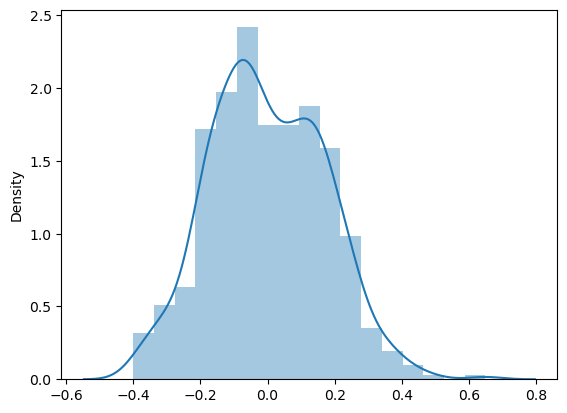

In [1528]:
res = y_train - y_train_pred
sns.distplot(res)

## 4. Evaluation of test set

In [1531]:
num_vars = ['temp', 'atemp', 'casual','registered', 'cnt', 'windspeed']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,fall,spring,summer,winter,clear,light snow,mist
184,0,7,1,1,0,0.831783,0.769660,63.7917,0.084219,0.933557,0.427086,0.692706,1,0,0,0,0,0,1
535,1,6,0,3,1,0.901354,0.842587,59.2083,0.153728,0.265163,0.767976,0.712034,0,0,1,0,1,0,0
299,0,10,0,4,1,0.511964,0.496145,81.2917,0.334206,0.072539,0.346376,0.303382,0,0,0,1,0,0,1
221,0,8,0,3,1,0.881625,0.795343,42.4167,0.339570,0.268820,0.559630,0.547400,1,0,0,0,1,0,0
152,0,6,0,4,1,0.817246,0.741471,30.5000,0.537414,0.223712,0.608143,0.569029,0,0,1,0,1,0,0


In [1533]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1539]:
X_test_sm = X_test_sm[cols]
X_test_sm = X_test_sm.drop(['hum', 'winter'], axis=1)
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,mnth,workingday,windspeed,fall,spring,summer,clear
184,1.0,7,0,0.084219,1,0,0,0
535,1.0,6,1,0.153728,0,0,1,1
299,1.0,10,1,0.334206,0,0,0,0
221,1.0,8,1,0.339570,1,0,0,1
152,1.0,6,1,0.537414,0,0,1,1


In [1541]:
y_test_pred = lr_rfe_model.predict(X_test_sm)

In [1545]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.39251269760918794

*The R Squared score (0.393) on the test data set matches the RFE based feature selection model i.e. 0.423*